In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.midi import *
from utils.data import *

In [ ]:
path = './data/pop/'
dfs = get_dfs_from_midi(path, min_notes=0, min_gap=0.)

In [ ]:
with open('./data/dataframes/pop/dfs_pop.pkl', 'wb') as f:
    pickle.dump(dfs, f)

In [2]:
with open('./data/dataframes/min_note_0_min_gap_0/dfs.pkl', 'rb') as f:
    dfs = pickle.load(f)

In [ ]:
sample_idx = np.random.randint(len(dfs))
midi_data = df_to_midi(dfs[sample_idx])
Fs = 44100
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

# Number of notes

In [ ]:
lens = [len(df) for df in dfs]
print('Number of songs:', len(dfs))
print('Max length:', max(lens))
print('Min length:', min(lens))
print('Mean length:', np.mean(lens))
sorted_lens = sorted(lens)
plt.bar(range(len(sorted_lens)), sorted_lens);

# Duration

In [ ]:
# Duration of melodies
durations = []
for df in dfs:
    durations.append(df['End'].max())
plt.hist(durations, bins=100);
min(durations), max(durations)

# Pitch range

Min pitch: 22
Max pitch: 105


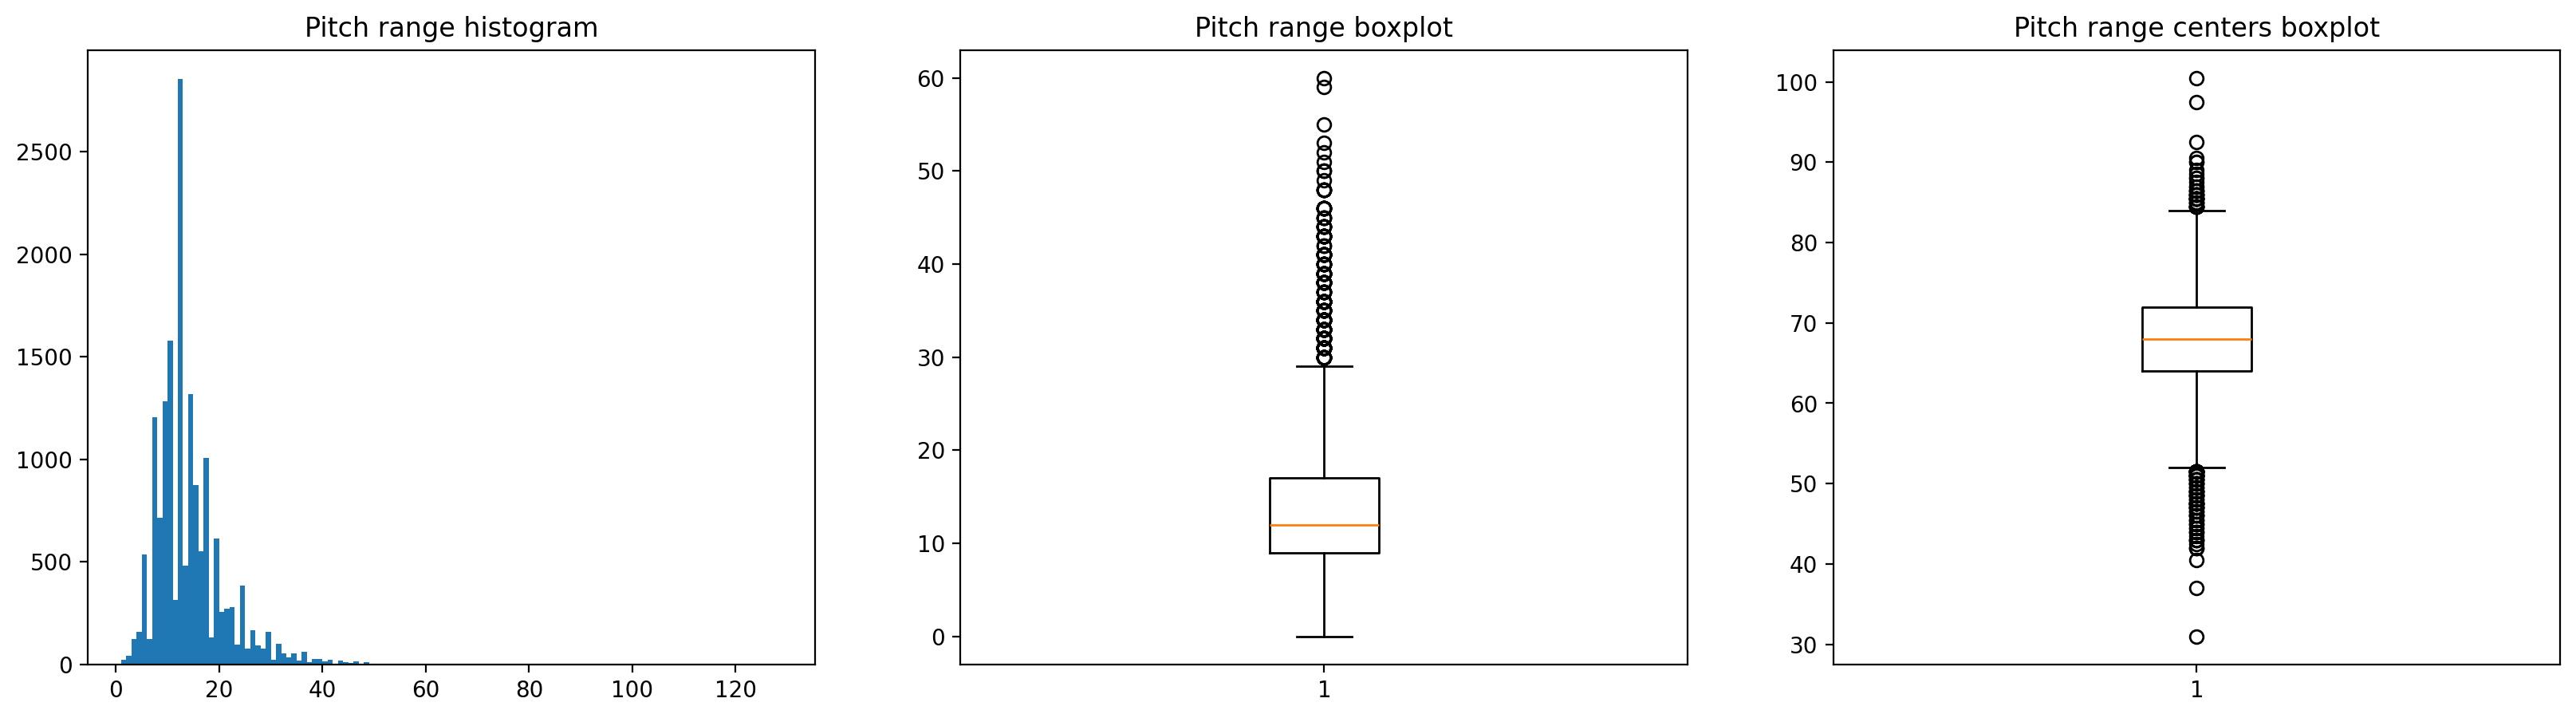

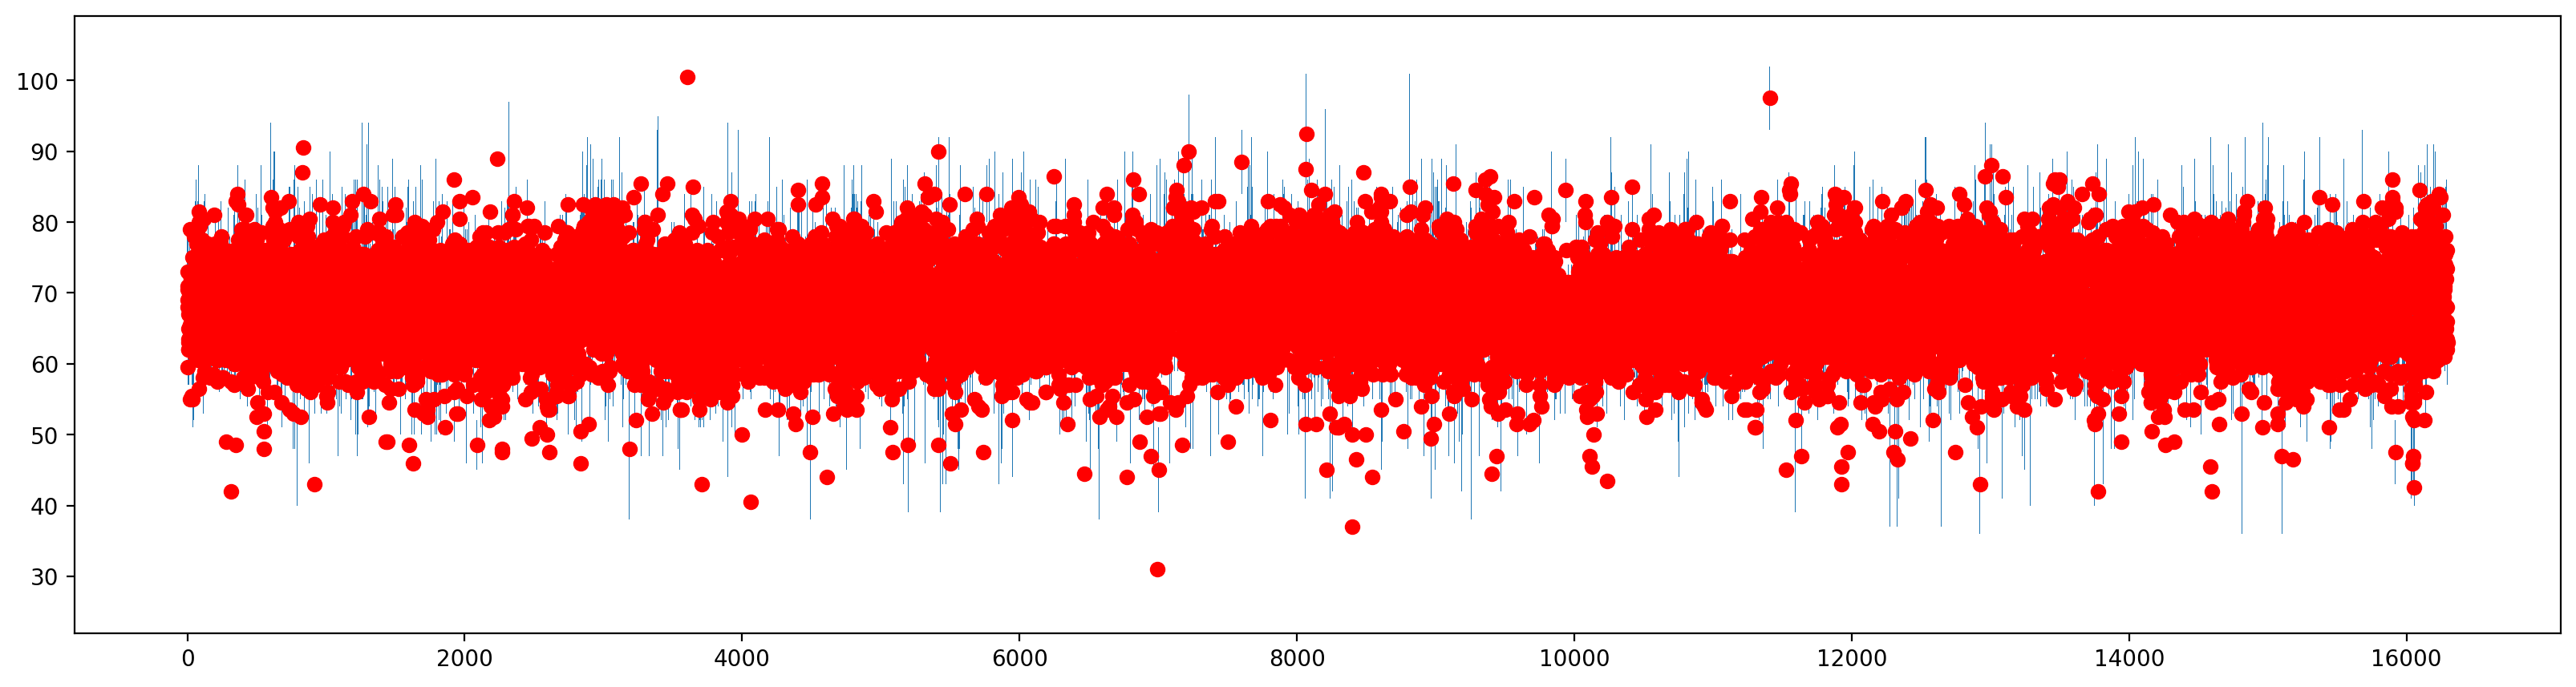

(22, 105)

In [3]:
pitch_range(dfs)

In [5]:
dfs2 = trim_by_range(dfs, min_range=5, max_range=60)

Min pitch: 22
Max pitch: 105


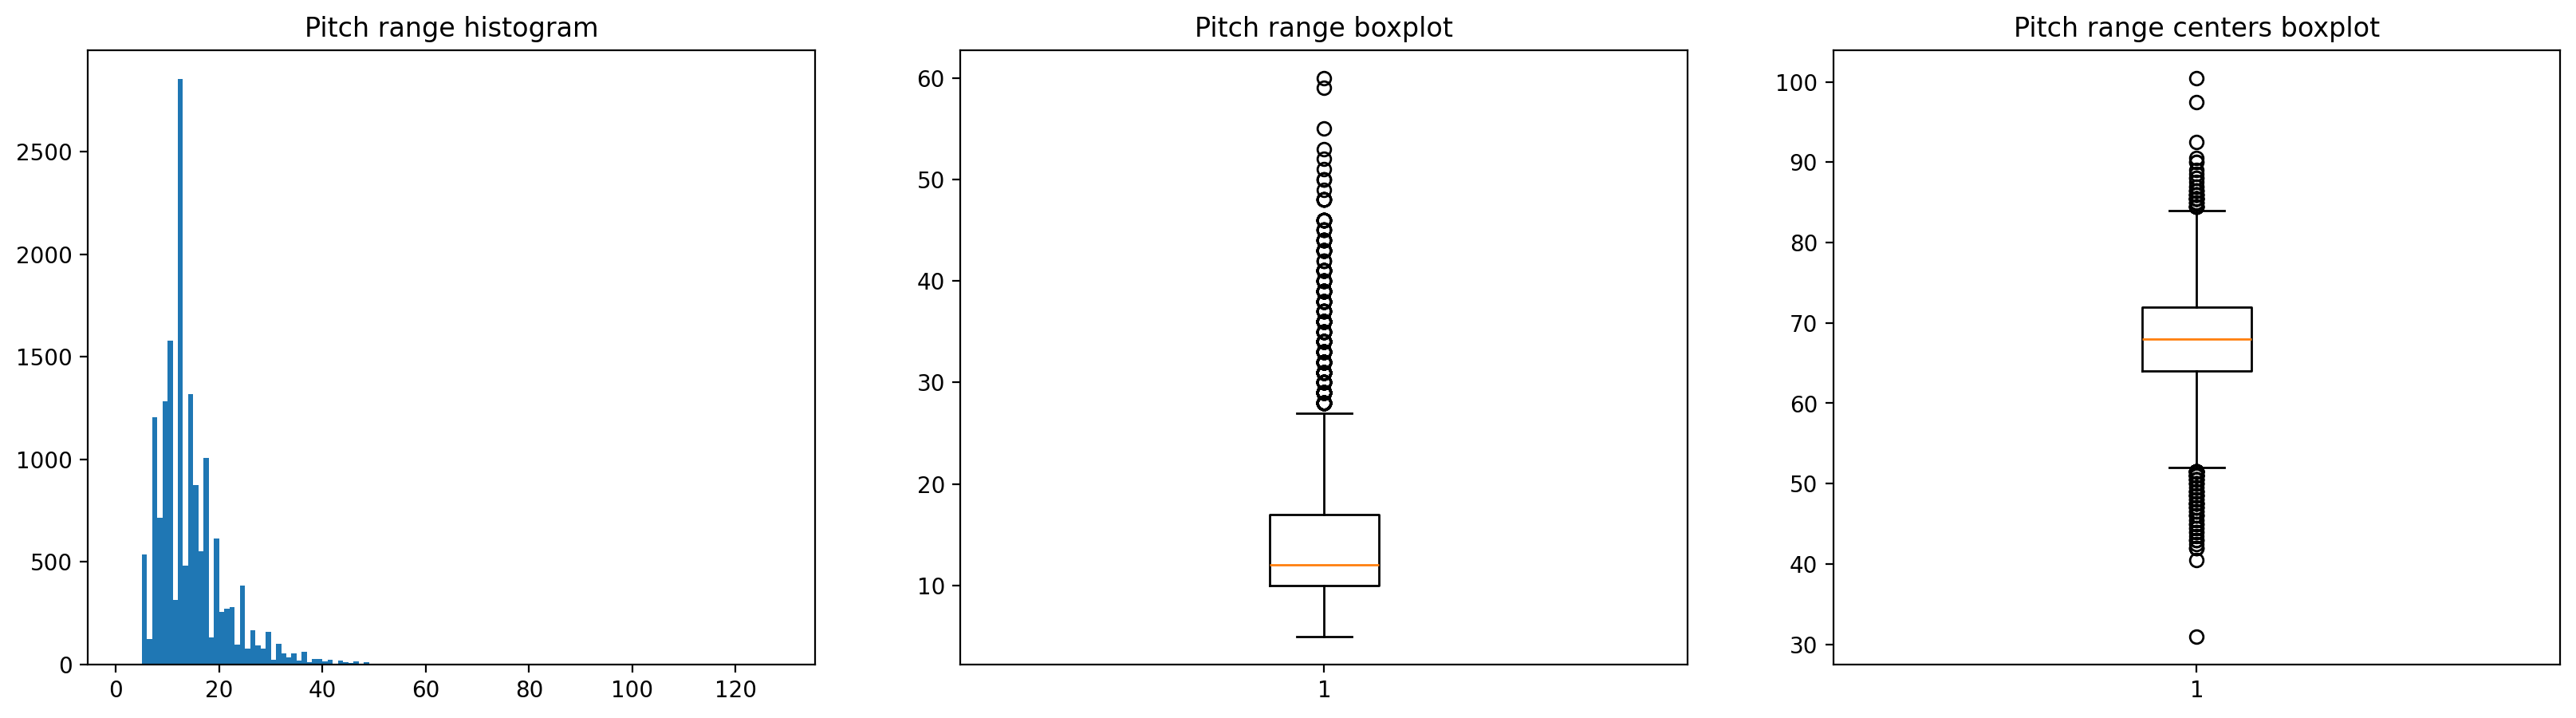

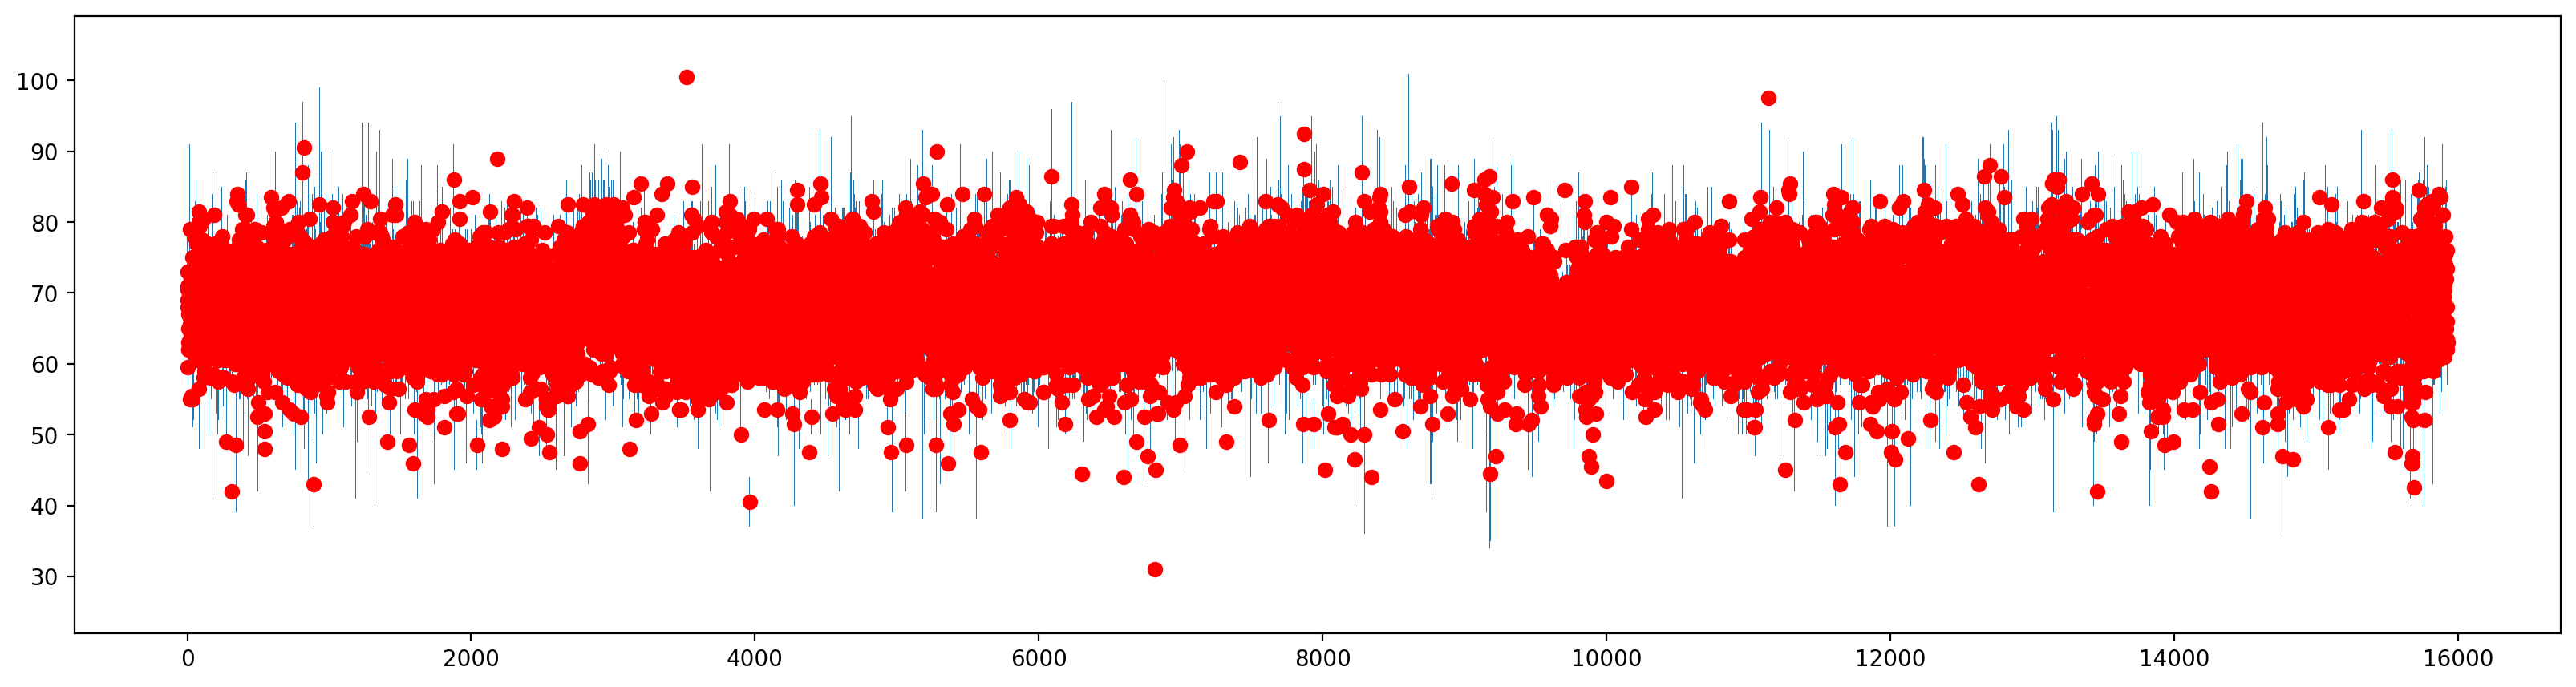

(22, 105)

In [6]:
pitch_range(dfs2)

In [13]:
for df in dfs2:
    center = (df['Pitch'].max() + df['Pitch'].min()) / 2
    if center < 40:
        display(df)
        temp_df = df.copy()

,Start,End,Pitch,Velocity,Instrument
0,0.000000,0.731708,27,80,melody
1,1.463416,2.195124,34,80,melody
2,2.560978,2.743905,29,80,melody
3,2.926832,3.658540,27,80,melody
4,4.390248,5.121956,34,80,melody
5,5.487810,5.670737,34,80,melody
6,5.853664,6.585372,27,80,melody
7,7.317080,8.048788,34,80,melody
8,8.414642,8.597569,29,80,melody
9,8.780496,9.512204,27,80,melody


In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot([0], [])

,Start,End,Pitch,Velocity,Instrument
0,0.000000,0.517242,69,80,melody
1,0.517242,1.034484,68,80,melody
2,1.034484,1.724140,69,80,melody
3,1.724140,2.068968,64,80,melody
4,2.068968,2.413796,64,80,melody
5,2.413796,2.758624,61,80,melody
6,2.758624,3.275866,66,80,melody
7,3.275866,4.827592,64,80,melody
8,4.827592,5.172420,64,80,melody
9,5.172420,5.517248,64,80,melody


In [ ]:
dfs3 = move_octaves(dfs2, min_pitch=0, max_pitch=48)
dfs3 = move_octaves(dfs3, min_pitch=48, max_pitch=80)

In [ ]:
pitch_range(dfs3)

In [ ]:
with open('./data/dataframes/pop/dfs_pitch_range_min_pitch_48_max_pitch_79.pkl', 'wb') as f:
    pickle.dump(dfs3, f)

# Octave translations

In [ ]:
sample_idx = 400
dfs3[sample_idx]

In [ ]:
Fs = 44100
midi_data = df_to_midi(dfs[sample_idx])
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

In [ ]:
df_octave_down = dfs[sample_idx].copy()
df_octave_down['Pitch'] = df_octave_down['Pitch'] - 12
midi_data = df_to_midi(df_octave_down)
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

# Gaps

In [ ]:
# measure gap between start of next note and end of previous note
neg_gaps = []
pos_gaps = []
for df in dfs:
    gap = df['Start'].iloc[1:].values - df['End'].iloc[:-1].values
    if gap.min() < 0:
        neg_gaps.append(df)
    if gap.max() > 0:
        pos_gaps.append(df)
print(len(neg_gaps), len(pos_gaps))

# Duration + Pitch format

In [ ]:
dfs4 = note_duration_transform(dfs3)

In [ ]:
dfs5, max_pitch = pitch_translation(dfs4)

In [ ]:
pitch_range(dfs5)

In [ ]:
with open('./data/dataframes/pop/dfs_note_dur_offset_47.pkl', 'wb') as f:
    pickle.dump(dfs5, f)

In [ ]:
with open('./data/dataframes/pop/dfs_note_dur_offset_47.pkl', 'rb') as f:
    dfs5 = pickle.load(f)

In [ ]:
dataset = NoteDurationDataset(dfs5, sample_len=20, scale=1., stride=10)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [ ]:
len(dataloader)